# Линейная регрессия


# **Часть 1**- двухпараметрическая регрессия

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица, содержащая объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные- 100 точек, разбросанных вокруг прямой y=10x-7. Из них 50 поместим в обучающую выборку и 50 в тестовую


In [ ]:
X_train =  10 * np.random.rand(50, 1)-5
y_train = 10 * X_train - 7+np.random.randn(50,1)*10
y_real=10 * X_train - 7
X_test = 10 * np.random.rand(50, 1)-5
y_test = 10 * X_test - 7+np.random.randn(50,1)*10

Визуализируем данные, используя библиотеку matplotlib.

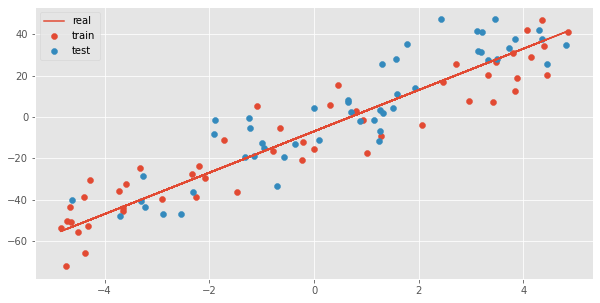

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_real, label='real') #линейный график
plt.scatter(X_train, y_train, label='train') #точечный график
plt.scatter(X_test, y_test, label='test') #точечный график
plt.legend(loc='best')
plt.show()

Поработаем с простейшим одномерным случаем регрессии. Обучим нашу модель на тренировочной выборке и предскажем значения на тестовой выброке.
 веса модели сохраним в переменные $\textbf{w}$, $b$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели
w=model.coef_
b=model.intercept_

In [ ]:
w, b

(array([[8.98044128]]), array([-8.69327491]))

Визуализируем предсказания.

In [ ]:
y_pred=model.predict(X_test)

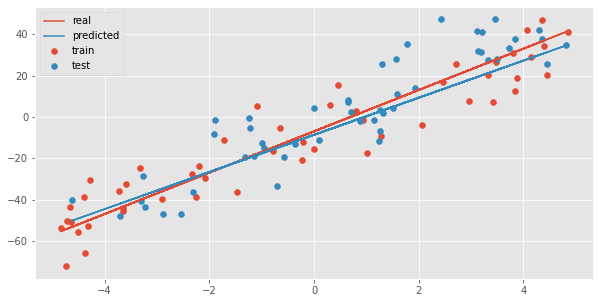

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_real, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test,y_pred, label='predicted')
plt.legend()
plt.show()

## Оценка результатов

Вычислим среднеквадратичную ошибку на трейне и на тесте. Также вычислим среднюю абсолютную ошибку и коэффициент детерминации.

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))


Train MSE:  109.46313399685117
Test MSE:  174.12794131015272


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  8.554474113094425
Test MAE:  10.364295369673536


In [ ]:
print('Train R^2: ',model.score(X_train, y_train) )
print('Test R^2: ', model.score(X_test, y_test))

Train R^2:  0.8856871943848201
Test R^2:  0.7767679096100372


#  **Часть 2**- многомерная  регрессия

#  датасет Boston

Будем работать с датасетом Boston. Этот датасет описывает средние цены на недвижимость в районах Бостона в $1000. 
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
house_data = load_boston()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
X['my_feature'] = X['CRIM'] * X['ZN']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,my_feature
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.11376
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.00000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.00000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.00000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0.00000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,0.00000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0.00000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,0.00000


Визуализируем распределения признаков в датасете

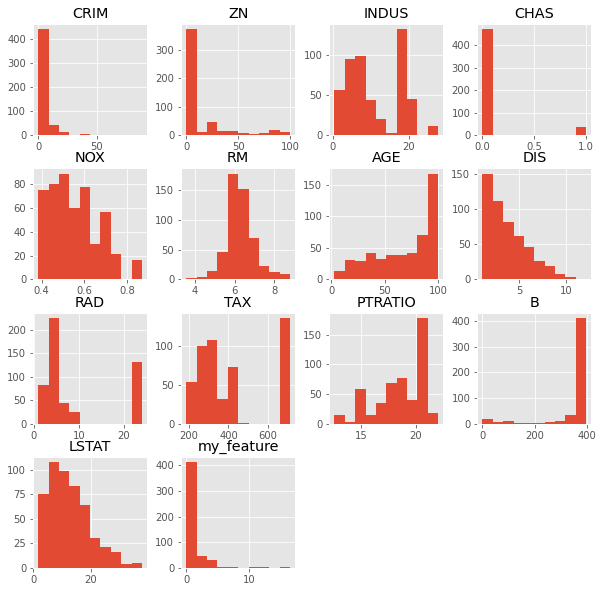

In [ ]:
_ =X.hist(X.columns, figsize=(10, 10))

Посмотрим на то, как скоррелированы данные

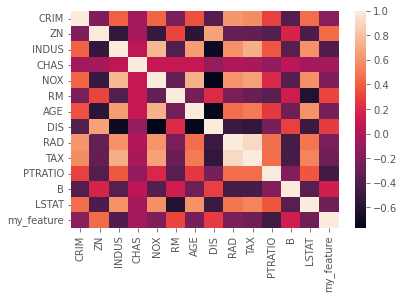

In [ ]:
import seaborn as sns

sns.heatmap(X.corr())

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
y_train.shape, y_test.shape

((354,), (152,))

Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))


Train MSE:  23.533260704685745
Test MSE:  19.470396081911545
Train MAE:  3.4019311474891616
Test MAE:  3.168924566346919


Визуализируем получившиеся веса

<BarContainer object of 14 artists>

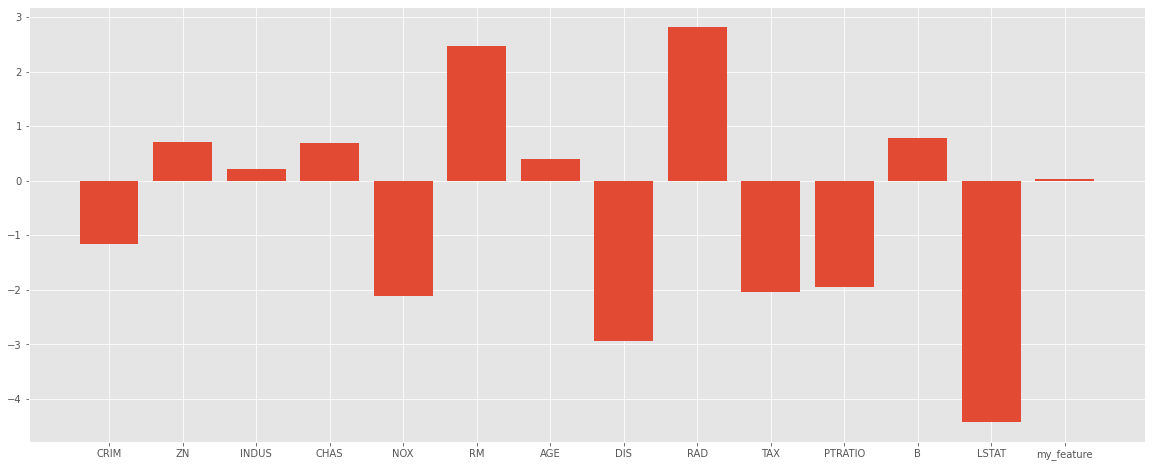

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

## Ridge & Lasso

Попытаемся исправить проблему переобучения для линейной регрессии. Замечено, что линейная регрессия переобучается, когда вектор весов имеет очень большие значения. Постараемся избежать этого, прибавив к функции потерь дополнительное слагаемое.

### Ridge regression:
$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w||^2 \rightarrow \min_{w}.$$

### Lasso regression:

$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w|| \rightarrow \min_{w}.$$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

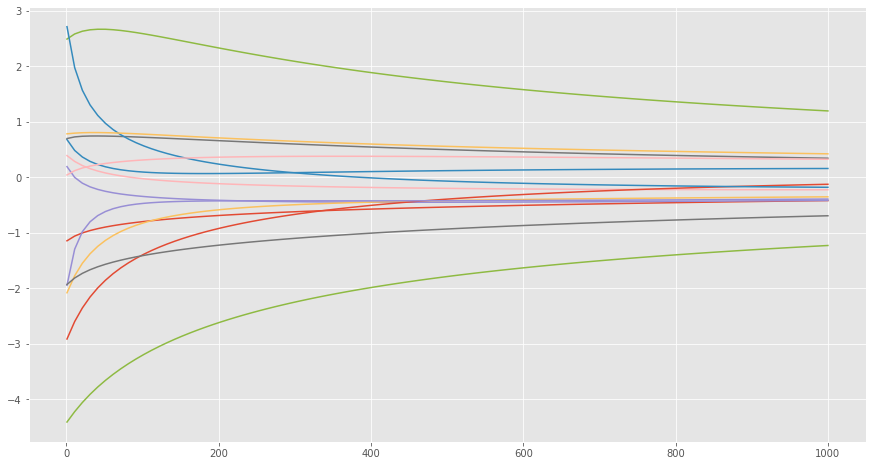

In [ ]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.figure(figsize=(15,8))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

<Figure size 720x360 with 0 Axes>

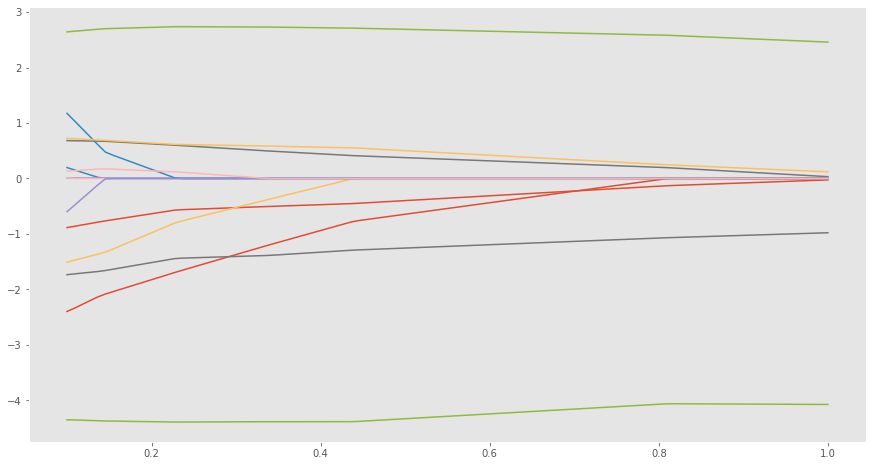

In [ ]:
alphas = np.linspace(0.1, 1, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.figure(figsize=(15,8))
plt.plot(alphas, weights.T)
plt.grid()
plt.show()